Classes: ['malignant' 'benign']
Number of features: 30

Training model...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training completed.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

CLASSIFICATION REPORT
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        43
      benign       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



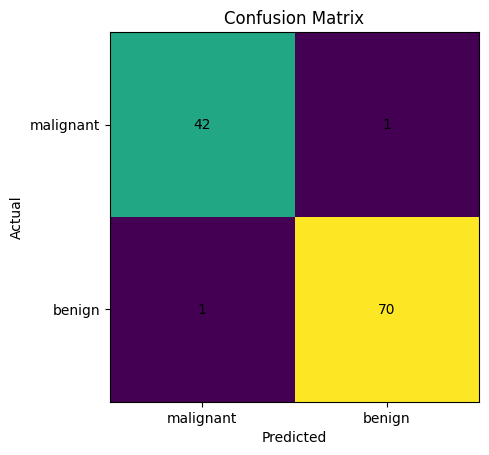

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# -------------------- 1. Load Dataset --------------------
data = load_breast_cancer()
X = data.data
y = data.target

print("Classes:", data.target_names)
print("Number of features:", X.shape[1])

# -------------------- 2. Train-Test Split --------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------- 3. Feature Scaling --------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# -------------------- 4. Neural Network --------------------
model = Sequential([
    Dense(32, activation='tanh', input_shape=(30,)),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# -------------------- 5. Training --------------------
print("\nTraining model...")
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
print("Training completed.")

# -------------------- 6. Predictions --------------------
y_probs = model.predict(X_test)
y_pred = (y_probs > 0.5).astype(int).flatten()

# -------------------- 7. Evaluation --------------------
print("\n==============================")
print("CLASSIFICATION REPORT")
print("==============================")
print(classification_report(y_test, y_pred, target_names=data.target_names))
# Print accuracy as a percentage
accuracy_pct = (y_pred == y_test).mean() * 100
print(f"Accuracy: {accuracy_pct:.2f}%")

cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0, 1], data.target_names)
plt.yticks([0, 1], data.target_names)

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()
